In [1]:
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as pl
%matplotlib inline

# Size matters in plots.
pl.rcParams['figure.figsize'] = (12.0, 10.0)

# Plotting with style! 
import seaborn as sb
     

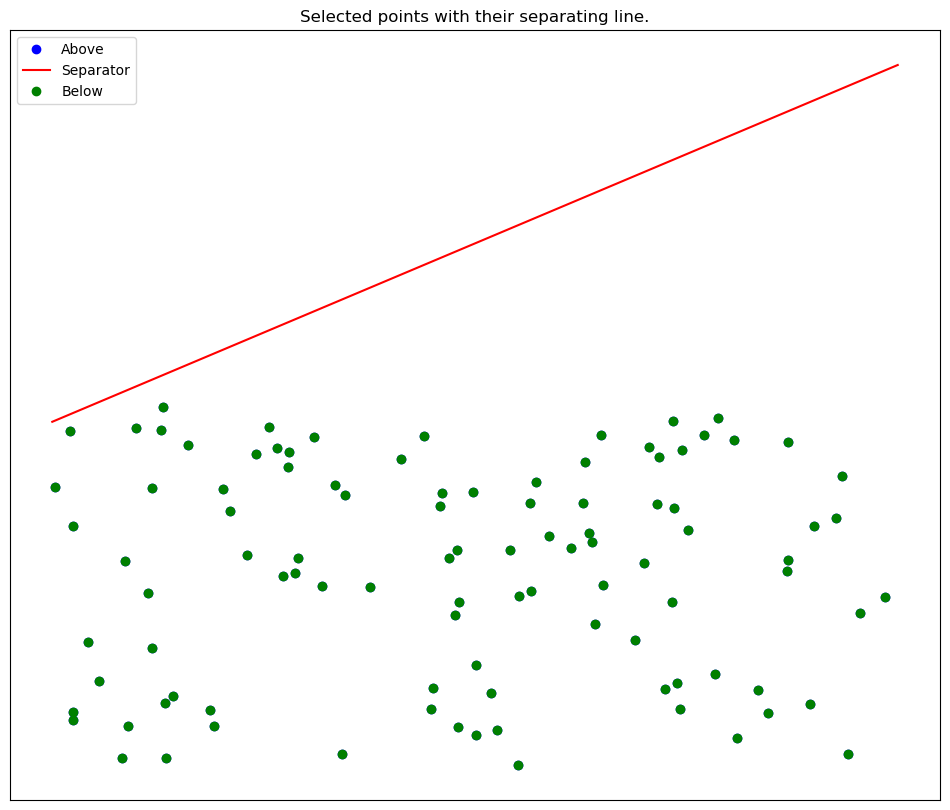

In [2]:
# Generate some points
N = 100
xn = nr.rand(N,2)

x = np.linspace(0,1);

# Pick a line 
a = nr.rand();
b = nr.rand();
f = lambda x : a*x + b;

fig =pl.figure()
figa = pl.gca();

pl.plot(xn[:,0],xn[:,1],'bo');
pl.plot(x,f(x),'r')

# Linearly separate the points by the line
yn = np.zeros([N,1]);

for i in range(N):
    if(f(xn[i,0])>xn[i,1]):
        # Point is below line
        yn[i] = 1;
        pl.plot(xn[i,0],xn[i,1],'go')
    else:
        # Point is above line
        yn[i] = -1;
        
        
pl.legend(['Above','Separator','Below'],loc=0)
pl.title('Selected points with their separating line.')
figa.axes.get_xaxis().set_visible(False)
figa.axes.get_yaxis().set_visible(False)


In [3]:
def perceptron(xn,yn,MaxIter=1000,w=np.zeros(3)):
    
    N = xn.shape[0];
    
    # Separating curve
    f = lambda x: np.sign(w[0]+w[1]*x[0]+w[2]*x[1]);

    for _ in range(MaxIter):
        i = nr.randint(N);
        if(yn[i] != f(xn[i,:])): # If not classified correctly, adjust the line to account for that point.
             w[0] = w[0] + yn[i];
             w[1] = w[1] + yn[i]*xn[i,0];
             w[2] = w[2] + yn[i]*xn[i,1];
            
    return w;

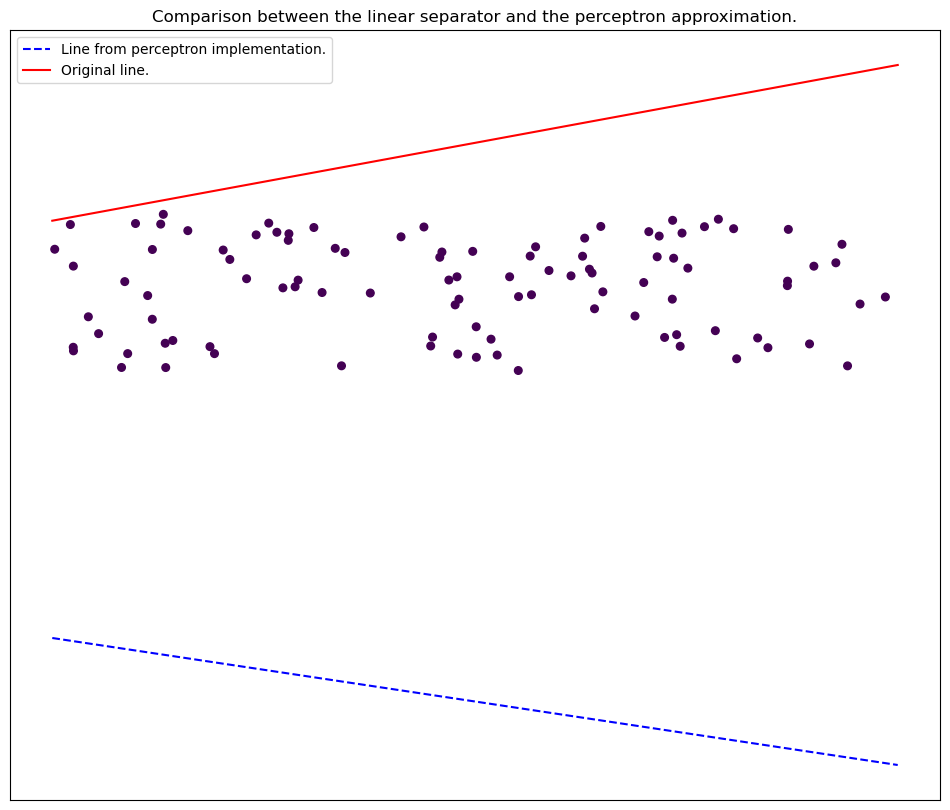

In [4]:
w= perceptron(xn,yn)

# Using weights w to compute a,b for a line y=a*x+b
bnew = -w[0]/w[2];
anew = -w[1]/w[2];
y = lambda x: anew * x + bnew;

# Computing the colors for the points
sep_color = (yn+1)/2.0;

pl.figure();
figa = pl.gca()

pl.scatter(xn[:,0],xn[:,1],c=sep_color, s=30)
pl.plot(x,y(x),'b--',label='Line from perceptron implementation.')
pl.plot(x,f(x),'r',label='Original line.')
pl.legend()

pl.title('Comparison between the linear separator and the perceptron approximation.')

figa.axes.get_xaxis().set_visible(False)
figa.axes.get_yaxis().set_visible(False)


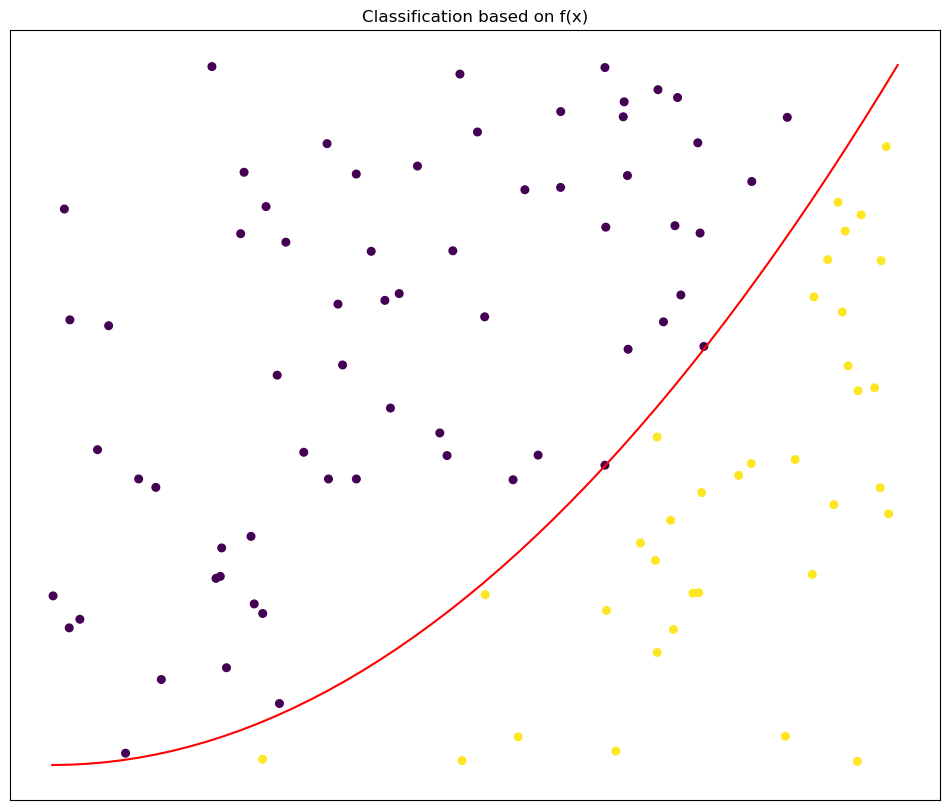

In [5]:
# Change this function to select points with respect to a different curve.
f = lambda x: x**2;

x = np.linspace(0,1);

# Generate some data points to play with.
N = 100
xn = nr.rand(N,2)

fig = pl.figure()
figa = pl.gca();

# Plot classifier 
pl.plot(x,f(x),'r')

# Classify based on f(x)
yn = np.sign(f(xn[:,0])-xn[:,1])

colors = (yn+1)/2.0;

pl.scatter(xn[:,0],xn[:,1],c=colors,s=30);
pl.title('Classification based on f(x)')

figa.axes.get_xaxis().set_visible(False)
figa.axes.get_yaxis().set_visible(False)

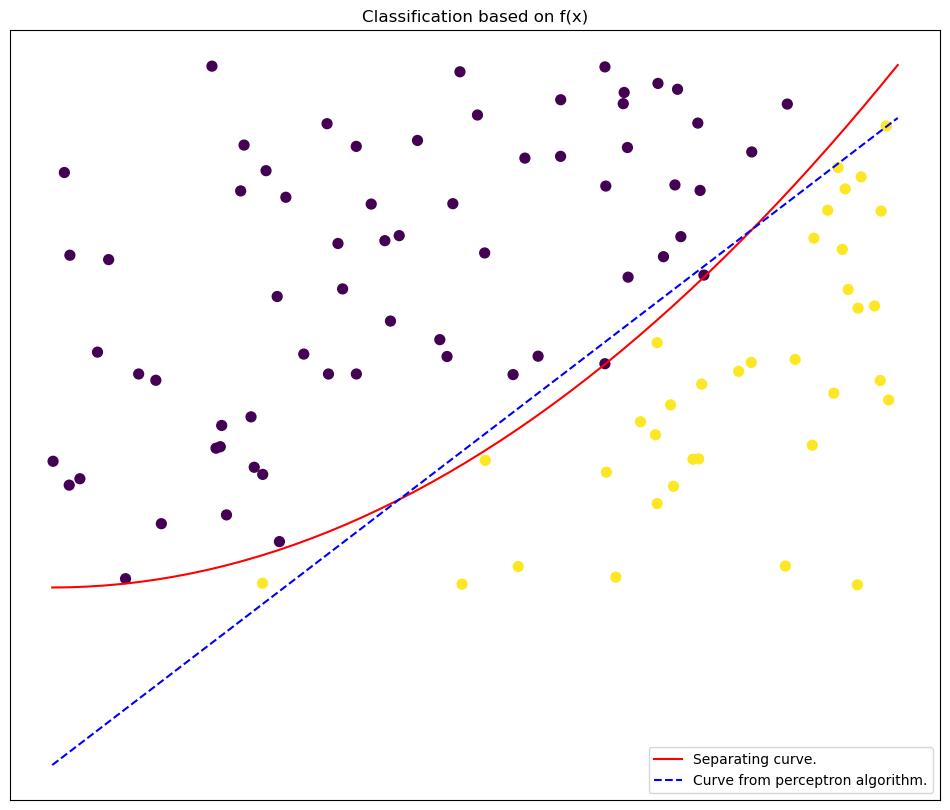

In [6]:
# Try percepton with that data.
w = perceptron(xn,yn,MaxIter=1000)

# Re-scale the weights to construct a new representation
bnew = -w[0]/w[2];
anew = -w[1]/w[2];
y = lambda x: anew * x + bnew;

figa = pl.gca()
pl.scatter(xn[:,0],xn[:,1],c=colors,s=50);
pl.title('Classification based on f(x)')

pl.plot(x,f(x),'r',label='Separating curve.')
pl.plot(x,y(x),'b--',label = 'Curve from perceptron algorithm.')

pl.legend()

figa.axes.get_xaxis().set_visible(False)
figa.axes.get_yaxis().set_visible(False)